Identify the World Hummus Order (WHO); top 3 hummus serving restaurants.

In [2]:
import os

os.chdir('C:/Users/esram/OneDrive/Desktop/esrabecode/delivery-market-analysis')

os.getcwd()

'C:\\Users\\esram\\OneDrive\\Desktop\\esrabecode\\delivery-market-analysis'

In [3]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('data/takeaway.db')

query = """
SELECT *
FROM (
    SELECT r.primarySlug,
           r.name,
           GROUP_CONCAT(LOWER(m.name), ', ') AS hummus_items,
           r.city,
           r.ratings,
           r.ratingsNumber,
           r.deliveryFee,
           r.durationRangeMin,
           r.durationRangeMax
    FROM restaurants r
    JOIN menuItems m
      ON r.primarySlug = m.primarySlug 
    WHERE LOWER(m.name) LIKE '%hummus%'
    GROUP BY r.primarySlug, r.name, r.city, r.ratings, r.ratingsNumber, r.deliveryFee, r.durationRangeMin, r.durationRangeMax
    ORDER BY r.ratingsNumber DESC
    LIMIT 50
) AS top_votes
WHERE ratings >= 4.5
ORDER BY ratings DESC
LIMIT 3;
"""
top_3_hummus = pd.read_sql_query(query, conn)
top_3_hummus
          

,primarySlug,name,hummus_items,city,ratings,ratingsNumber,deliveryFee,durationRangeMin,durationRangeMax
0,restaurant-le-royal,Restaurant le Royal,"hummus, hummus bi lahme",Bruxelles-Capitale,5.0,359,5.0,30,55
1,royal-donuts-bagels-maasmechelen,Royal Donuts & Bagels,bagel hummus,Maasmechelen,5.0,94,4.0,20,45
2,the-black-horse,The Black Horse,"hummus (pita), hummus (minischotel), hummus (m...",Heist-op-den-Berg,4.9,127,0.0,10,20


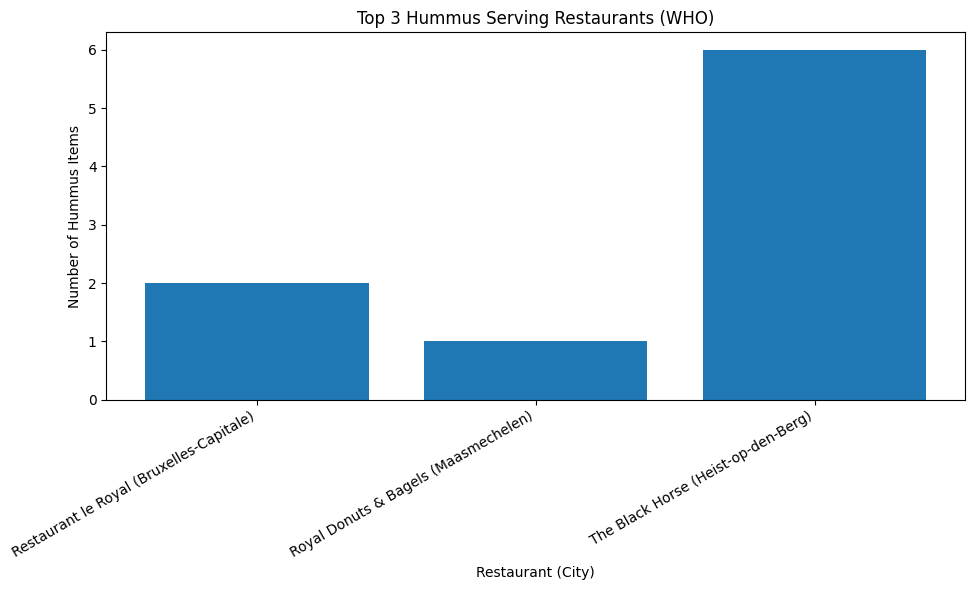

In [ ]:
import matplotlib.pyplot as plt


top_3_hummus['label'] = top_3_hummus['name'] + " (" + top_3_hummus['city'] + ")"


top_3_hummus['hummus_count'] = top_3_hummus['hummus_items'].apply(
    lambda x: len(x.split(', '))
)

plt.figure(figsize=(10, 6))

plt.bar(
    top_3_hummus['label'],
    top_3_hummus['hummus_count']
)

plt.xlabel('Restaurant (City)')
plt.ylabel('Number of Hummus Items')
plt.title('Top 3 Hummus Serving Restaurants (WHO)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()
